IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import data set into notebook

In [2]:
data = pd.read_csv("titanic.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.iloc[0]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                                 22
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [5]:
data.iloc[0:8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


Select the columns Name and Age

In [6]:
data.loc[:,['Name','Age']]

,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0
5,"Moran, Mr. James",NaN
6,"McCarthy, Mr. Timothy J",54.0
7,"Palsson, Master. Gosta Leonard",2.0
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0
9,"Nasser, Mrs. Nicholas (Adele Achem)",14.0


Check the number of Female and Male who Survived and died

In [7]:
data.groupby(['Sex','Survived'])['PassengerId'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: PassengerId, dtype: int64

Checking the info of our data

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
data .shape

(891, 12)

dropping all columns not needed

In [10]:
data.drop(data.columns[[0,3,8,10]], axis=1, inplace=True)

In [11]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Check for counts for missing values

In [12]:
data[data.isnull().any(axis=1)].count()

Survived    179
Pclass      179
Sex         179
Age           2
SibSp       179
Parch       179
Fare        179
Embarked    177
dtype: int64

Drop all nulls(NANS)

In [13]:
data_df=data.dropna()

In [14]:
data_df.shape

(712, 8)

In [15]:
data_df[data_df.isnull().any(axis=1)].count()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

NOW OUR DATA SET HAS NO MISSING VALUES

DESCRIBING OUR DATA SET

In [16]:
data_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


THE MINIMUM AGE OF A PERSON ON BOARD WAS 4 MONTHS WHILE THAT OF THE MAXIMUM WAS 80 YEARS

VISUALIZATION

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


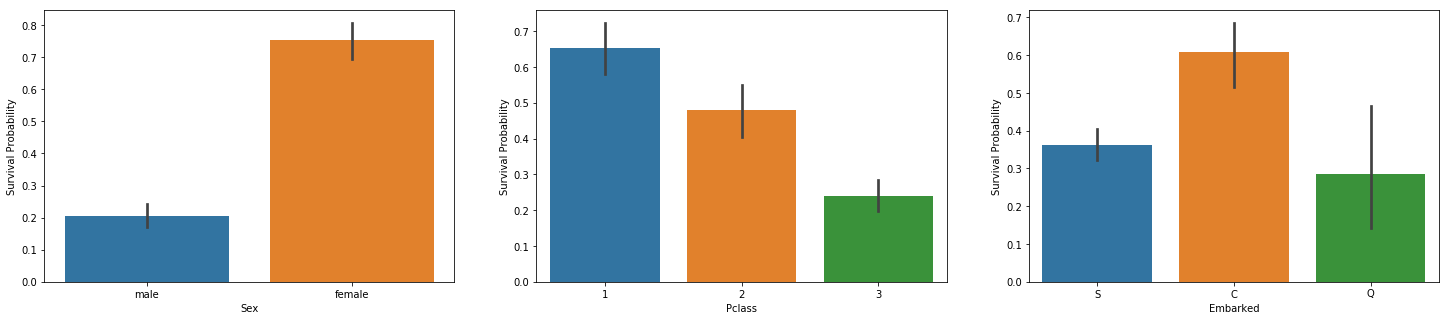

In [17]:
Chart, items=plt.subplots(1,3,figsize=(25,5))
CGender=sns.barplot(x="Sex",y="Survived",data=data_df,ax=items[0])
CGender=CGender.set_ylabel("Survival Probability")
CClass=sns.barplot(x="Pclass",y="Survived",data=data_df,ax=items[1])
CClass=CClass.set_ylabel("Survival Probability")
CEmbarked=sns.barplot(x="Embarked",y="Survived",data=data_df,ax=items[2])
CEmbarked=CEmbarked.set_ylabel("Survival Probability")

Survival Probabilities of the female Passengers is greater than that of the male passengers
The survival Probabilities of the Class one passengers is more than that of any other class
Those passengers that embarked at point c survied more

Text(0, 0.5, 'Survived')

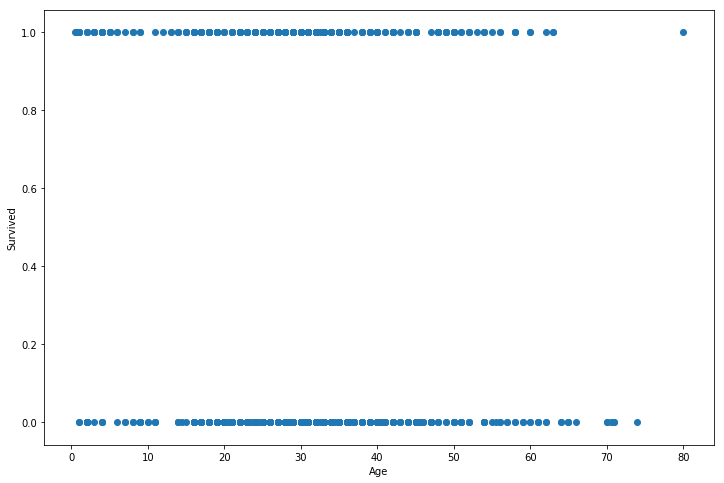

In [18]:
fig,ax=plt.subplots(figsize=(12, 8))
plt.scatter(data_df['Age'], data_df['Survived'])
plt.xlabel('Age')
plt.ylabel('Survived')

The Old people Also suvived

Text(0, 0.5, 'Survived')

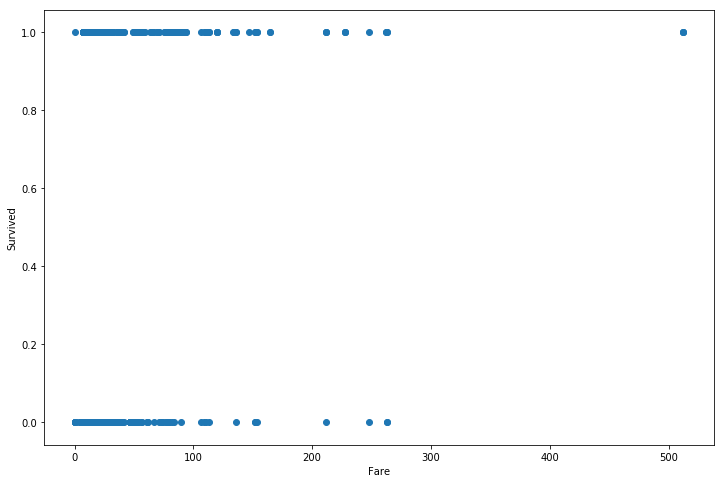

In [19]:
fig, ax=plt.subplots(figsize=(12,8))
plt.scatter(data_df['Fare'], data_df['Survived'])
plt.xlabel('Fare')
plt.ylabel('Survived')

The person who paid a very high sum of 500 survived but more people who paid between 300 to 450 did not survive

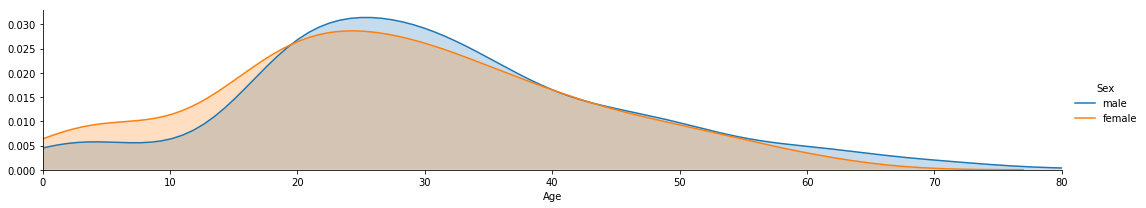

In [20]:
as_fig=sns.FacetGrid(data_df,hue='Sex',aspect=5)
as_fig.map(sns.kdeplot,'Age',shade=True)
oldest=data_df['Age'].max()
as_fig.set(xlim=(0,oldest))
as_fig.add_legend()

More males than females were on board between 20 to 40 years but more females were predominant other places   

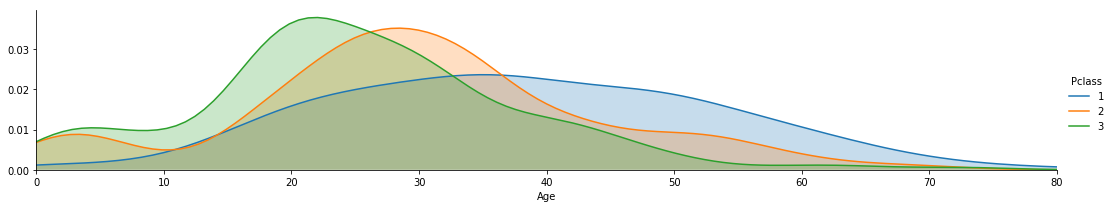

In [21]:
as_fig=sns.FacetGrid(data_df,hue='Pclass',aspect=5)
as_fig.map(sns.kdeplot,'Age',shade=True)
oldest=data_df['Age'].max()
as_fig.set(xlim=(0,oldest))
as_fig.add_legend()

There were more older passengers in P-class one

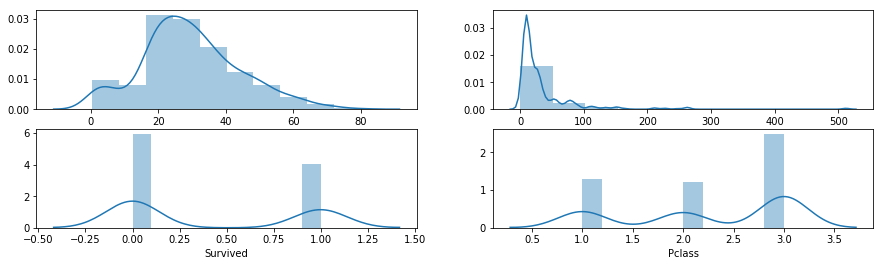

In [22]:
f,ax=plt.subplots(2,2,figsize=(15,4))
vis1=sns.distplot(data_df["Age"], bins=10, ax=ax[0][0])
vis2=sns.distplot(data_df["Fare"],bins=10, ax=ax[0][1])
vis3=sns.distplot(data_df["Survived"],bins=10,ax=ax[1][0])
vis4=sns.distplot(data_df["Pclass"],bins=10, ax=ax[1][1])

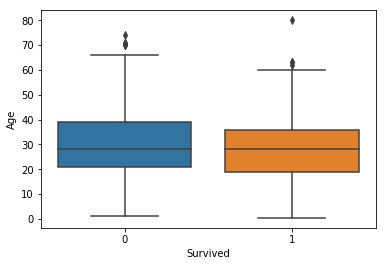

In [23]:
vis5=sns.boxplot(data=data_df,x="Survived",y="Age")
fig=vis5.get_figure()
fig.savefig("fig1.png")

The box plot shows that we have some extreme ages between 60 to 70 among those who survived or who did not

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


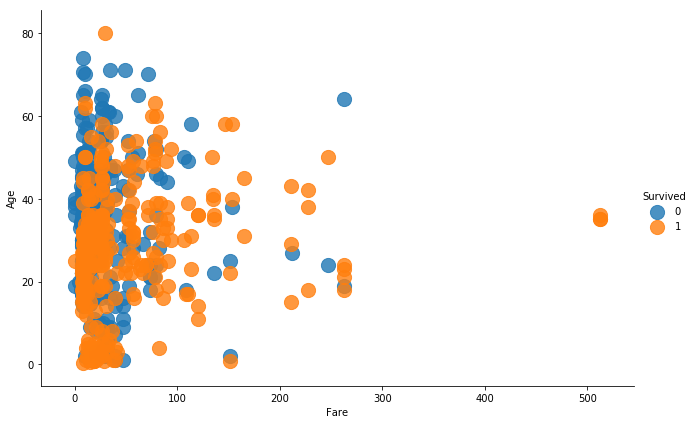

In [24]:
vis7=sns.lmplot(data=data_df,x="Fare",y="Age",fit_reg=False,hue="Survived",size=6, aspect=1.5, scatter_kws={'s':200},)

Many passengers paid less than 100 pounds but two of them paid about 500 pounds still, they were at thier 40's   

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


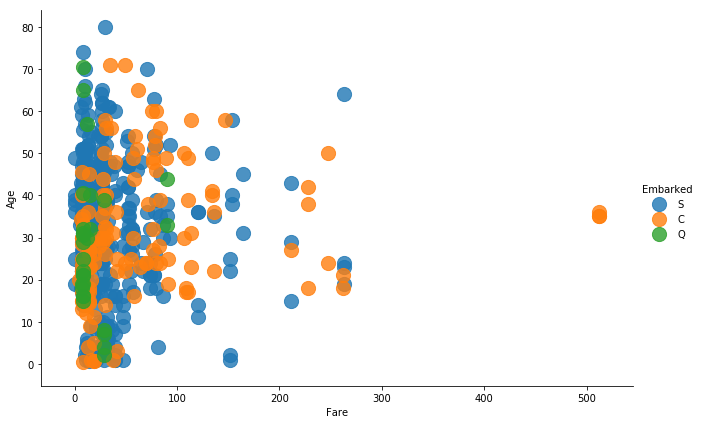

In [25]:
vis8=sns.lmplot(data=data_df,x="Fare", y="Age",fit_reg=False,\
                hue="Embarked",\
                size=6, aspect=1.5, scatter_kws={'s':200},)

Passengers with the highest fare, boarded the ship from France heading to America 

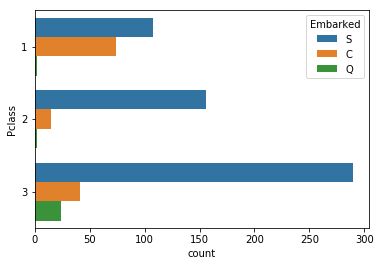

In [26]:
sns.countplot(y="Pclass",hue="Embarked",data=data_df);

The Passengers that boarded the Ship at S, were the most at point 3 and the but very few boarded the ship at queenstern

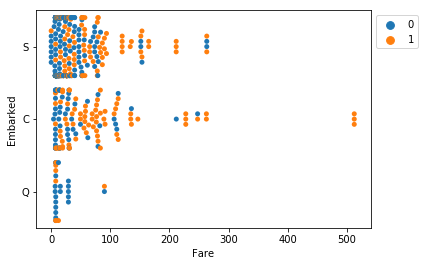

In [27]:
vis9=sns.swarmplot(x="Fare",y="Embarked", hue="Survived",data=data_df)
vis9.legend_.remove()
plt.legend(loc="upper left",bbox_to_anchor=(1,1))
plt.show()



Most passengers that died boarded the ship at Southampton but the least death came from Southampton

In [28]:
data_data_corr=data_df.corr()
data_data_corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


Correlation is used for getting the relationship between variables

There is this relatoinship between Fare and Survived that makes sense

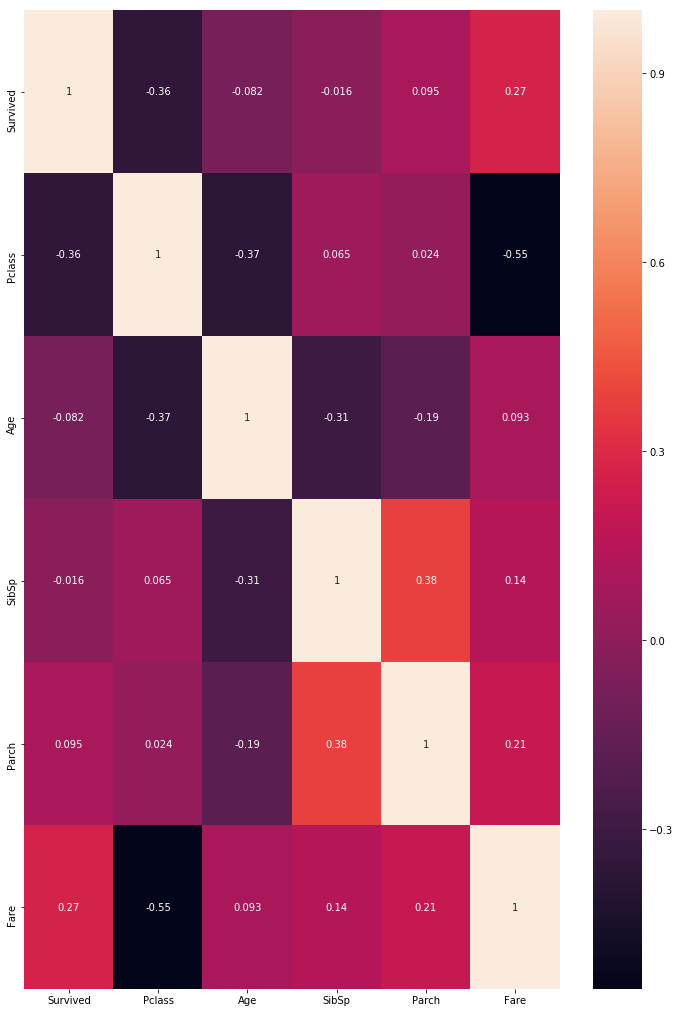

In [29]:
fig, ax=plt.subplots(figsize=(12,18))
sns.heatmap(data_data_corr, annot=True)

The intensity of the colours determines the correlation

# PROCESSING FOR MACHINE LEARNING MODEL

In [30]:
from sklearn import preprocessing
label_encoding=preprocessing.LabelEncoder()
data_df['Sex']=label_encoding.fit_transform(data_df['Sex'].astype(str))
data_df.head()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


Apply one hot Encoding to split 'Embarked' into dummies with seperate columns

In [40]:
data_df=pd.get_dummies(data_df,columns=['Embarked'])
data_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [31]:
data_df.shape

(712, 8)

Now we have  our 10 columns due to one hot encoding
Split our data set and train set

In [41]:
from sklearn.model_selection import train_test_split

X=data_df.drop('Survived', axis=1)
Y=data_df['Survived']

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [42]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,0
2,3,0,26.0,0,0,7.9250,0,0,1
3,1,0,35.0,1,0,53.1000,0,0,1
4,3,1,35.0,0,0,8.0500,0,0,1
6,1,1,54.0,0,0,51.8625,0,0,1
7,3,1,2.0,3,1,21.0750,0,0,1
8,3,0,27.0,0,2,11.1333,0,0,1
9,2,0,14.0,1,0,30.0708,1,0,0
10,3,0,4.0,1,1,16.7000,0,0,1


In [43]:
Y

0      0
1      1
2      1
3      1
4      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
18     0
20     0
21     1
22     1
23     1
24     0
25     1
27     0
30     0
33     0
34     0
35     0
37     0
38     0
      ..
856    1
857    1
858    1
860    0
861    0
862    1
864    0
865    1
866    1
867    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64

In [44]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
219,2,1,30.0,0,0,10.5000,0,0,1
574,3,1,16.0,0,0,8.0500,0,0,1
8,3,0,27.0,0,2,11.1333,0,0,1
604,1,1,35.0,0,0,26.5500,1,0,0
873,3,1,47.0,0,0,9.0000,0,0,1
21,2,1,34.0,0,0,13.0000,0,0,1
716,1,0,38.0,0,0,227.5250,1,0,0
798,3,1,30.0,0,0,7.2292,1,0,0
880,2,0,25.0,0,1,26.0000,0,0,1
207,3,1,26.0,0,0,18.7875,1,0,0


x_train.info()

In [45]:
x_train.shape,y_train.shape

((569, 9), (569,))

Underfitting----> Performs poorly on the train & poorly on the test
Overfit---->Performs poorly on the train but well on test 

In [46]:
from sklearn.linear_model import LogisticRegression 
logistic_model=LogisticRegression(penalty='l2',C=1.0,solver='liblinear').fit(x_train,y_train)

The model using the L1 algorithm is called Lasso Regression while that of L2 is called Ridge
It Shrinks your Model Remoing some Features alltogether

Lasso means "Least Absolute Shrinkage and selection operator" ........ Ridge adds "squared magnitude"

Reguarization helps to solve the overfitting problem and can be used for many problems
Penalysing your Model ....> Using your L1 or L2 to prevent overfetting


In [47]:
y_pred=logistic_model.predict(x_test)

In [48]:
y_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1])

In [49]:
pred_results=pd.DataFrame({'y_test':y_test,
                         'y_pred':y_pred})

In [50]:
pred_results.head(10)

,y_test,y_pred
259,1,1
806,0,0
535,1,1
691,1,1
572,1,0
850,0,0
80,0,0
112,0,0
676,0,0
581,1,1


In [51]:
print("Training set score:{:.3f}".format(logistic_model.score(x_train,y_train)))
print("Test set score:{:.3f}".format(logistic_model.score(x_test,y_test)))

Training set score:0.794
Test set score:0.818


The test score should always be greater than the training score

In [52]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [54]:
acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)

print("accuracy_score:",acc)
print("precision_score:",prec)
print("recall_score:",recall)

accuracy_score: 0.8181818181818182
precision_score: 0.7450980392156863
recall_score: 0.7450980392156863


precition is always the lowest here, they are impressive

In [55]:
from sklearn import metrics

In [56]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test,y_pred)))

Confusion Matrix
[[79 13]
 [13 38]]


# Precision

False Positive and negatigve has to be very low

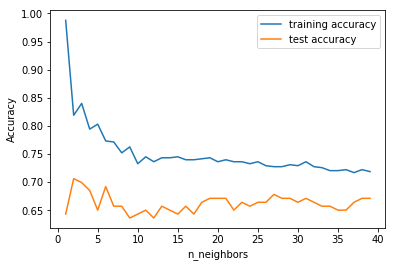

In [107]:
from sklearn.neighbors import KNeighborsClassifier
training_accuracy=[]
test_accuracy=[]

neighbors_settings=range(1,40)
for n_neighbors in neighbors_settings:

    knn=KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train,y_train)

    training_accuracy.append(knn.score(x_train,y_train))

    test_accuracy.append(knn.score(x_test,y_test))

plt.plot(neighbors_settings,training_accuracy,label="training accuracy")
plt.plot(neighbors_settings,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [108]:
print('Accuracy of K-NN classifier on training set:{:.2f}'.format(knn.score(x_train,y_train)))
print('Accuracy of K-NN classifier on test set:{:.2f}'.format(knn.score(x_test,y_test)))

Accuracy of K-NN classifier on training set:0.72
Accuracy of K-NN classifier on test set:0.67


In [109]:
knn=KNeighborsClassifier(n_neighbors=30)
knn.fit(x_train,y_train)
print('Accuracy of K-NN classifier on trainig set:{:.2f}'.format(knn.score(x_train,y_train)))
print('Accuracy of K-NN classifier on test set:{:.2f}'.format(knn.score(x_test,y_test)))

Accuracy of K-NN classifier on trainig set:0.73
Accuracy of K-NN classifier on test set:0.66


In [111]:
y_predknn=knn.predict(x_test)
print(metrics.accuracy_score(y_test,y_predknn))

0.6643356643356644


In [112]:
acc=accuracy_score(y_test,y_predknn)
prec=precision_score(y_test,y_predknn)
recall=recall_score(y_test,y_predknn)

print("accuracy_score:",acc)
print("precisiion_score:",prec)
print("recall_score:",recall)

accuracy_score: 0.6643356643356644
precisiion_score: 0.5428571428571428
recall_score: 0.37254901960784315


Recall is 37 which is good

In [113]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test,y_predknn)))

Confusion Matrix
[[76 16]
 [32 19]]
